In [21]:
import tensorflow as tf
from tensorflow.keras import models
import matplotlib.pyplot as plt



In [38]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS=50

In [23]:
## import the dataset from directory to ram
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [ ]:
## which classes
classes = dataset.class_names
classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [25]:
len(dataset) ##  it means number of batches

68

In [26]:
68*32

2176

In [27]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 1 0 0 0 2 0 0 1 1 0 1 1 1 2 0 1 1 1 0 0 0 1 2 0 1 1 1 0 0]


In [28]:
print(image_batch[0])

tf.Tensor(
[[[192. 187. 193.]
  [186. 181. 187.]
  [184. 179. 185.]
  ...
  [165. 162. 171.]
  [177. 174. 183.]
  [178. 175. 184.]]

 [[196. 191. 197.]
  [189. 184. 190.]
  [185. 180. 186.]
  ...
  [164. 161. 170.]
  [178. 175. 184.]
  [182. 179. 188.]]

 [[198. 193. 199.]
  [190. 185. 191.]
  [185. 180. 186.]
  ...
  [163. 160. 169.]
  [179. 176. 185.]
  [187. 184. 193.]]

 ...

 [[150. 143. 150.]
  [142. 135. 142.]
  [135. 128. 135.]
  ...
  [135. 129. 139.]
  [140. 134. 144.]
  [133. 127. 137.]]

 [[145. 138. 145.]
  [142. 135. 142.]
  [138. 131. 138.]
  ...
  [136. 130. 140.]
  [144. 138. 148.]
  [139. 133. 143.]]

 [[141. 134. 141.]
  [142. 135. 142.]
  [142. 135. 142.]
  ...
  [131. 125. 135.]
  [132. 126. 136.]
  [125. 119. 129.]]], shape=(256, 256, 3), dtype=float32)


In [29]:
## convert into numpy arrays
print(image_batch[0].numpy())

[[[192. 187. 193.]
  [186. 181. 187.]
  [184. 179. 185.]
  ...
  [165. 162. 171.]
  [177. 174. 183.]
  [178. 175. 184.]]

 [[196. 191. 197.]
  [189. 184. 190.]
  [185. 180. 186.]
  ...
  [164. 161. 170.]
  [178. 175. 184.]
  [182. 179. 188.]]

 [[198. 193. 199.]
  [190. 185. 191.]
  [185. 180. 186.]
  ...
  [163. 160. 169.]
  [179. 176. 185.]
  [187. 184. 193.]]

 ...

 [[150. 143. 150.]
  [142. 135. 142.]
  [135. 128. 135.]
  ...
  [135. 129. 139.]
  [140. 134. 144.]
  [133. 127. 137.]]

 [[145. 138. 145.]
  [142. 135. 142.]
  [138. 131. 138.]
  ...
  [136. 130. 140.]
  [144. 138. 148.]
  [139. 133. 143.]]

 [[141. 134. 141.]
  [142. 135. 142.]
  [142. 135. 142.]
  ...
  [131. 125. 135.]
  [132. 126. 136.]
  [125. 119. 129.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


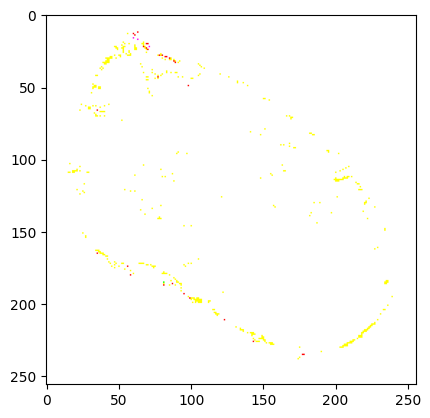

In [30]:
## visualize the image
plt.imshow(image_batch[0].numpy())

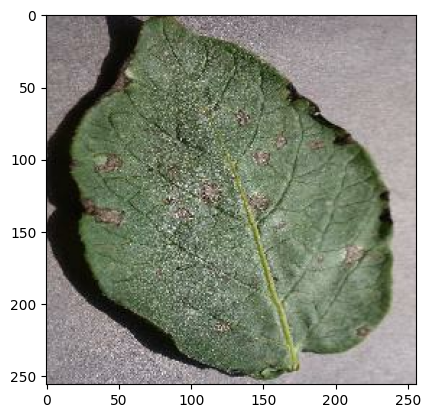

In [34]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    


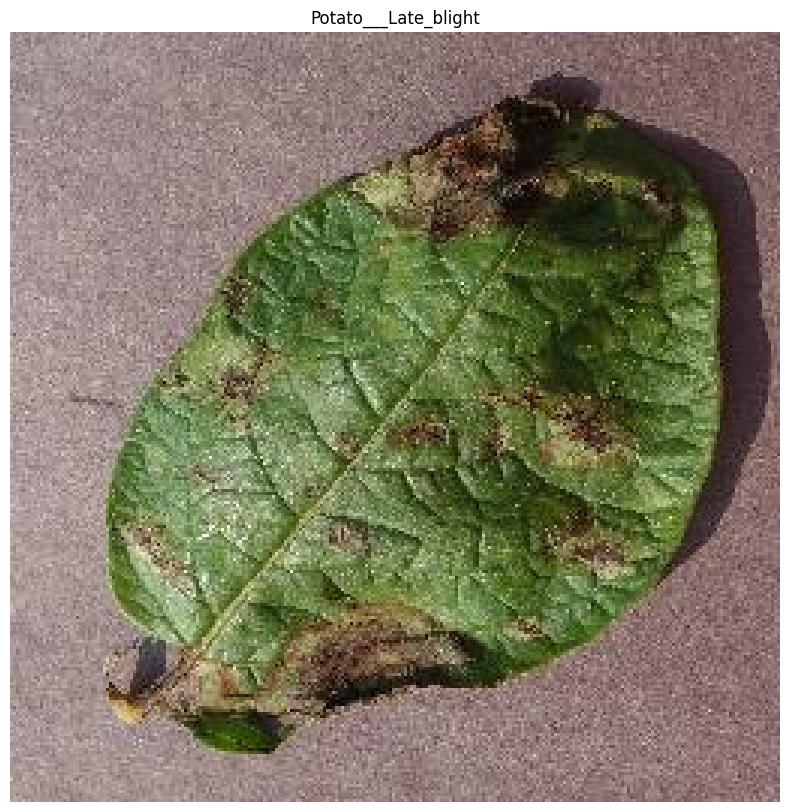

In [37]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(dataset.class_names[label_batch[i]])
        plt.axis("off")


In [39]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [40]:
train_ds = dataset.take(54)
train_ds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [41]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [42]:
test_size = dataset.skip(54)
len(test_size)

14

In [43]:
test_size = test_size.skip(6)
len(test_size)

8